# Data Fetching from Auto.am

This project aims to collect data from auto.am using different scraping tools (Scrapy and Selenium) and see the frequency distribution of car brands as well as years of manufacturing. Auto.am is the biggest Armenian online platform for selling cars.
Another objective of this project is to get the data which would provide some meaningful insights into Armenian car market. For that reason, only data about customs-cleared automobiles will be scraped. This data could be useful for different applications.

In [124]:
import re
import time
import requests
import numpy as np
import pandas as pd
from scrapy.http import TextResponse
import time
import requests
import pandas as pd
from selenium import webdriver
import selenium.webdriver.common.keys as Keys
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt

In [2]:
url='https://auto.am/'
browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get(url)


Checking for mac64 chromedriver:76.0.3809.126 in cache
Driver found in /Users/vahe_shelunts/.wdm/chromedriver/76.0.3809.126/mac64/chromedriver


/Users/vahe_shelunts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


In [3]:
browser.find_element_by_class_name('lever').click()
browser.find_element_by_class_name('toggle-adv-search ').click()

In [4]:
browser.find_element_by_id('search-btn').click()

To scrape the listings from all pages, the list with all urls will be needed. Url names can be changed by changing the number of the page (e.g. 1,2,5) in the url name. The problem with the website is that from page 200 onwards, indexing in the url name by page does not work. For that reason, a filter will be applied to scrape the data in smaller cohorts (with all listings available in less than 200 pages). The Year of Manufacturing filter will be applied and data will be fetched in 3 parts, listing from production years 1980-2002,2002-2015 and 2015 and 2019. These segments were chosen randomly. The lists will be combined later.

In [5]:
browser.find_element_by_id('range-85-to').clear()

In [6]:
browser.find_element_by_id('range-85-to').send_keys('2002')

In [7]:
browser.find_element_by_id('research-btn').click()

In [8]:
all_urls=["https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%22"+str(i)+"%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%221911%22,%22lt%22:%222002%22},%22usdprice%22:{%22gt%22:%220%22,%22lt%22:%22100000000%22},%22custcleared%22:%221%22,%22mileage%22:{%22gt%22:%2210%22,%22lt%22:%221000000%22}}" for i in range(1,186)]

In [9]:
all_urls[:5] #urls for different pages work

['https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%221%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%221911%22,%22lt%22:%222002%22},%22usdprice%22:{%22gt%22:%220%22,%22lt%22:%22100000000%22},%22custcleared%22:%221%22,%22mileage%22:{%22gt%22:%2210%22,%22lt%22:%221000000%22}}',
 'https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%222%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%221911%22,%22lt%22:%222002%22},%22usdprice%22:{%22gt%22:%220%22,%22lt%22:%22100000000%22},%22custcleared%22:%221%22,%22mileage%22:{%22gt%22:%2210%22,%22lt%22:%221000000%22}}',
 'https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%223%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%221911%22,%22lt%22:%222002%22},%2

In [11]:
page=browser.page_source
response=TextResponse(url=browser.current_url, body=page, encoding = 'utf-8')

In [12]:
response.css('span.grey-text::text').extract()[:5] #manufacturing years

['1997', '1997', '2001', '1997', '1996']

In [13]:
#brands
[i.strip() for i in response.css('div[class="pad-top-6 pad-bot-6"]>span[class="card-title bold"]::text').extract()[1::2][:5]]

['Mercedes-Benz E 320',
 'Mercedes-Benz C 180',
 'Nissan Skyline',
 'Volkswagen Golf',
 'Opel Vectra B']

In [10]:
# Defining a function that will scrape data from all the urls
def car_scraper(url):
    browser.get(url)
    time.sleep(2)
    page=browser.page_source
    response=TextResponse(url=url, body=page, encoding = 'utf-8')
    years=response.css('span.grey-text::text').extract()
    cars=[i.strip() for i in response.css('div[class="pad-top-6 pad-bot-6"]>span[class="card-title bold"]::text').extract()[1::2]]
    return years,cars

In [8]:
all_urls1=["https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%22"+str(i)+"%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%221911%22,%22lt%22:%222002%22},%22usdprice%22:{%22gt%22:%220%22,%22lt%22:%22100000000%22},%22custcleared%22:%221%22,%22mileage%22:{%22gt%22:%2210%22,%22lt%22:%221000000%22}}" for i in range(1,20)]

In [43]:
#getting car brands and their respective years of manufacturing from all urls
all_cars=[]
all_years=[]
for i in all_urls:
    all_years.extend(car_scraper(i)[0])
    all_cars.extend(car_scraper(i)[1])

In [42]:
print(len(all_cars)) 
print(len(all_years))

8539
8539


All the data have been scraped. 
Now the filters will be changed, to scrape data about automobiles from 2003-2012 years.

In [30]:
browser.find_element_by_id('range-85-from').clear()

In [31]:
browser.find_element_by_id('range-85-from').send_keys('2003')

In [32]:
browser.find_element_by_id('range-85-to').clear()

In [33]:
browser.find_element_by_id('range-85-to').send_keys('2007')

In [34]:
browser.find_element_by_id('research-btn').click()

In [35]:
#second set of urls for cars of 2003-2007 yy
all_urls2=['https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%22'+str(i)+'%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%222003%22,%22lt%22:%222007%22},%22usdprice%22:{%22gt%22:%220%22,%22lt%22:%22100000000%22},%22custcleared%22:%221%22,%22mileage%22:{%22gt%22:%2210%22,%22lt%22:%221000000%22}}' for i in range(1,172)]

In [38]:
all_urls2[:3]

['https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%221%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%222003%22,%22lt%22:%222007%22},%22usdprice%22:{%22gt%22:%220%22,%22lt%22:%22100000000%22},%22custcleared%22:%221%22,%22mileage%22:{%22gt%22:%2210%22,%22lt%22:%221000000%22}}',
 'https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%222%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%222003%22,%22lt%22:%222007%22},%22usdprice%22:{%22gt%22:%220%22,%22lt%22:%22100000000%22},%22custcleared%22:%221%22,%22mileage%22:{%22gt%22:%2210%22,%22lt%22:%221000000%22}}',
 'https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%223%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%222003%22,%22lt%22:%222007%22},%2

In [40]:
#getting car brands and their respective years of manufacturing from all urls
for i in all_urls2:
    all_years.extend(car_scraper(i)[0])
    all_cars.extend(car_scraper(i)[1])

In [44]:
print(len(all_cars))
print(len(all_years))

17789
17789


In [45]:
#urls for remaining years 2oo8-2019 yy.
all_urls3=['https://auto.am/search/passenger-cars?q={%22category%22:%221%22,%22page%22:%22'+str(i)+'%22,%22sort%22:%22latest%22,%22layout%22:%22list%22,%22user%22:{%22dealer%22:%220%22,%22id%22:%22%22},%22year%22:{%22gt%22:%222008%22,%22lt%22:%222019%22},%22usdprice%22:{%22gt%22:%220%22,%22lt%22:%22100000000%22},%22custcleared%22:%221%22,%22mileage%22:{%22gt%22:%2210%22,%22lt%22:%221000000%22}}' for i in range(1,177)]

In [47]:
#getting car brands and their respective years of manufacturing from all urls
for i in all_urls3:
    all_years.extend(car_scraper(i)[0])
    all_cars.extend(car_scraper(i)[1])

In [48]:
print(len(all_cars)) #all the data has been scraped
print(len(all_years))

26550
26550


In [50]:
data.to_excel('auto.am_data.xlsx') #exporting to excel for later usage

In [87]:
all_brands=[i.split()[0] for i in all_cars] #creating two new lists (brand name and model) from all_brand strings
all_models=[i.split()[-1] for i in all_cars]

In [88]:
data=pd.DataFrame({"Brand":all_brands,"Model":all_models,"Year":all_years}) #creating a dataframe for analysis

In [89]:
data.head()

,Brand,Model,Year
0,Mini,Cooper,2005
1,Toyota,Camry,2007
2,Nissan,March,2006
3,Audi,Q7,2006
4,Nissan,Teana,2005


In [103]:
print(data.Brand.value_counts()[:10]) #brands with highest quantities
print('\n')
print(data.Brand.value_counts(normalize=True)[:10])

Mercedes-Benz    5751
Opel             2838
Nissan           2525
BMW              2473
Toyota           2410
VAZ(Lada)        1279
Volkswagen       1064
Mitsubishi        814
Honda             797
Hyundai           776
Name: Brand, dtype: int64


Mercedes-Benz    0.216610
Opel             0.106893
Nissan           0.095104
BMW              0.093145
Toyota           0.090772
VAZ(Lada)        0.048173
Volkswagen       0.040075
Mitsubishi       0.030659
Honda            0.030019
Hyundai          0.029228
Name: Brand, dtype: float64


Most cars sold on auto.am are Mercedez-Benz. Interestingly enough, the percentage of cars is twice as much as that of other brand in top 5. Besides the fact that Mercedez-Bez is popular among people living in Armenia (and perhapes Armenians in general, more research needed on this), Mercedenz-Benz is a very durable car and many cars of 1990s years of production are still usable these days. It can be assumed that a certain proportion of Mercedez cars constitutes those ofn 1990s years of production. I will check it now.

In [113]:
data[data.Brand=='Mercedes-Benz'].Year.value_counts()[:10]

1998    451
2000    440
1997    410
1996    388
2006    382
2007    357
2001    337
1999    325
2008    303
2005    300
Name: Year, dtype: int64

As shown by the output above, most Mercedes cars listed on the website were produced in 1990-2000 yy. which justifies my assumption.
The same test can be done for other brand in top 3 such as Opel and Nissan.

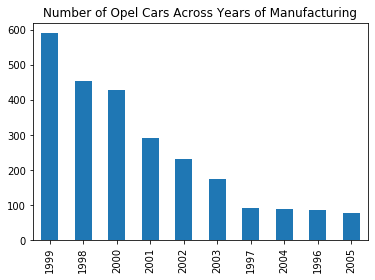

In [126]:
data[data.Brand=='Opel'].Year.value_counts()[:10].plot(kind='bar');
plt.title('Number of Opel Cars Across Years of Manufacturing');

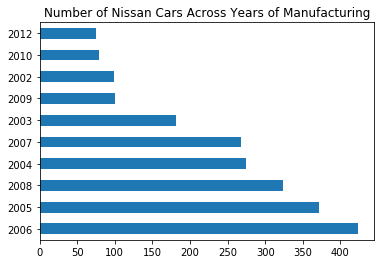

In [128]:
data[data.Brand=='Nissan'].Year.value_counts()[:10].plot(kind='barh');
plt.title('Number of Nissan Cars Across Years of Manufacturing');

In [92]:
brands=pd.Series(all_cars) #looking at the frequency of brand+model, noy included in the final dataframe
brands.value_counts()[:10]

Opel Astra             1581
Toyota Camry            947
Mercedes-Benz C 180     764
Mercedes-Benz E 320     628
Nissan Tiida            626
Opel Zafira             550
BMW X5                  411
Mercedes-Benz E 350     407
Nissan Teana            393
Toyota Alphard          346
dtype: int64

In [129]:
data.Year.value_counts()[:10] #highest number of cars are produced in these years

2006    1947
2008    1944
2007    1899
2005    1675
2004    1639
2003    1379
2000    1378
1999    1333
2002    1246
2001    1227
Name: Year, dtype: int64